In [ ]:
!pip install susi
!pip install catboost

  Created wheel for susi: filename=susi-1.2.2-py3-none-any.whl size=26889 sha256=d5c73c0ce8c3a6bf73bf5ff684f6f5f7a5d4cecbc15af139d9fbb14f28f58ad7
  Stored in directory: /root/.cache/pip/wheels/0b/64/36/b21fb1595a8c693b545719175d354c3ed710896f5b4c4d6763
Successfully built susi
     |████████████████████████████████| 76.6 MB 84.4 MB/s 


In [ ]:
import susi
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import catboost as cb
from sklearn.utils import shuffle 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import paired_distances
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#DBGB
df_1 = pd.read_excel('/content/gdrive/MyDrive/DATA/NEW_DAT/Master_100N (1).xlsx') 
df_2 = pd.read_excel('/content/gdrive/MyDrive/DATA/NEW_DAT/Master_120N.xlsx')
df_3 = pd.read_excel('/content/gdrive/MyDrive/DATA/NEW_DAT/Master_130N.xlsx')
df_4 = pd.read_excel('/content/gdrive/MyDrive/DATA/NEW_DAT/Master_140N.xlsx')
# df_L = pd.read_excel('/content/gdrive/MyDrive/DATA/NEW_DAT/Master_120N.xlsx')

# #ATHARVA
# df=pd.read_excel('/content/gdrive/MyDrive/DATA/NEW_DAT/Master_100N.xlsx')

# Holed plates

In [ ]:
df_1.head(5)

,Node Number,X Location (m),Y Location (m),Z Location (m),Maximum Principal Stress (Pa),Maximum Principal Elastic Strain (m/m),Max Shear Stress (Pa),Normal Stress (Pa) (X),Normal Stress (Pa) (Y),Normal Stress (Pa) (Z),Normal Elastic Strain (m/m) (X),Normal Elastic Strain (m/m) (Y),Normal Elastic Strain (m/m) (Z),Shear Elastic Strain (m/m) (XY),Shear Elastic Strain (m/m) (XZ),Shear Elastic Strain (m/m) (YZ)
0,1,0.069255,0.001923,0.12408,11039.0,8.021400e-08,-722.87,1838.7,31.021,-7510.8,2.041300e-08,8.663100e-09,-4.035800e-08,-9.397300e-09,1.693200e-07,-1.068400e-09
1,2,0.069255,0.003846,0.12408,10732.0,7.723900e-08,-1049.80,2104.9,111.240,-7202.4,2.116100e-08,8.202500e-09,-3.933600e-08,-1.364700e-08,1.606500e-07,-8.547200e-10
2,3,0.069255,0.005769,0.12408,10645.0,7.588600e-08,-1074.80,2340.9,220.320,-7023.0,2.190900e-08,8.124700e-09,-3.895700e-08,-1.397300e-08,1.563600e-07,-4.571600e-10
3,4,0.069255,0.007692,0.12408,10632.0,7.521700e-08,-890.30,2522.8,327.260,-6922.5,2.250700e-08,8.235900e-09,-3.888800e-08,-1.157400e-08,1.543500e-07,-1.669300e-10
4,5,0.069255,0.009615,0.12408,10637.0,7.486500e-08,-578.47,2643.4,409.710,-6869.1,2.290600e-08,8.387100e-09,-3.892500e-08,-7.520000e-09,1.534700e-07,-2.643200e-11


In [ ]:
df_1.columns

Index(['Node Number', 'X Location (m)', 'Y Location (m)', 'Z Location (m)',
       'Maximum Principal Stress (Pa)',
       'Maximum Principal Elastic Strain (m/m)', 'Max Shear Stress (Pa)',
       'Normal Stress (Pa) (X)', 'Normal Stress (Pa) (Y)',
       'Normal Stress (Pa) (Z)', 'Normal Elastic Strain (m/m) (X)',
       'Normal Elastic Strain (m/m) (Y)', 'Normal Elastic Strain (m/m) (Z)',
       'Shear Elastic Strain (m/m) (XY)', 'Shear Elastic Strain (m/m) (XZ)',
       'Shear Elastic Strain (m/m) (YZ)', 'sigma x + sigma z',
       'epsilon x + epsilon z'],
      dtype='object')

In [ ]:
df_1['sigma x + sigma z'] = df_1['Normal Stress (Pa) (X)'] +df_1['Normal Stress (Pa) (Z)']
df_1['epsilon x + epsilon z'] = df_1['Normal Elastic Strain (m/m) (X)'] + df_1['Normal Elastic Strain (m/m) (Z)']

df_2['sigma x + sigma z'] = df_2['Normal Stress (Pa) (X)'] +df_2['Normal Stress (Pa) (Z)']
df_2['epsilon x + epsilon z'] = df_2['Normal Elastic Strain (m/m) (X)'] + df_2['Normal Elastic Strain (m/m) (Z)']

df_3['sigma x + sigma z'] = df_3['Normal Stress (Pa) (X)'] +df_3['Normal Stress (Pa) (Z)']
df_3['epsilon x + epsilon z'] = df_3['Normal Elastic Strain (m/m) (X)'] + df_3['Normal Elastic Strain (m/m) (Z)']

df_4['sigma x + sigma z'] = df_4['Normal Stress (Pa) (X)'] +df_4['Normal Stress (Pa) (Z)']
df_4['epsilon x + epsilon z'] = df_4['Normal Elastic Strain (m/m) (X)'] + df_4['Normal Elastic Strain (m/m) (Z)']

## Stress VS Strain invariant plots

Text(0.5, 1.0, 'Stress VS Strain invariants for validated dataset- 100 N loading')

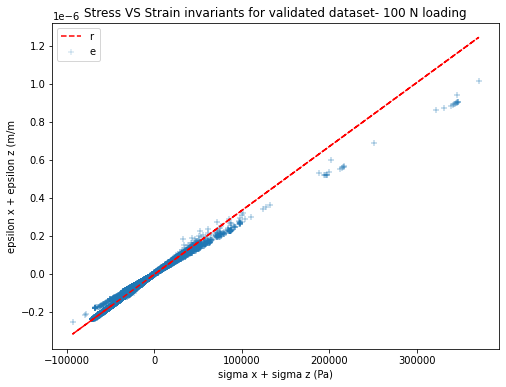

In [ ]:
# sns.regplot(x='sigma x + sigma z', y='epsilon x + epsilon z', data=df_1, marker='+', ci=None)

fig, ax= plt.subplots(1, figsize=(8, 6))

sns.scatterplot(data=df_1, x='sigma x + sigma z', y='epsilon x + epsilon z', marker='+', alpha=0.5)
ax.set_xlabel('sigma x + sigma z (Pa)')
ax.set_ylabel('epsilon x + epsilon z (m/m')
m, b = np.polyfit(df_1['sigma x + sigma z'], df_1['epsilon x + epsilon z'], 1)
plt.plot(df_1['sigma x + sigma z'], m*df_1['sigma x + sigma z'] + b, color='red', linestyle='dashed')
plt.legend('reference linear behaviour')
plt.title('Stress VS Strain invariants for validated dataset- 100 N loading')

Text(0.5, 1.0, 'Stress VS Strain invariants for validated dataset- 120 N loading')

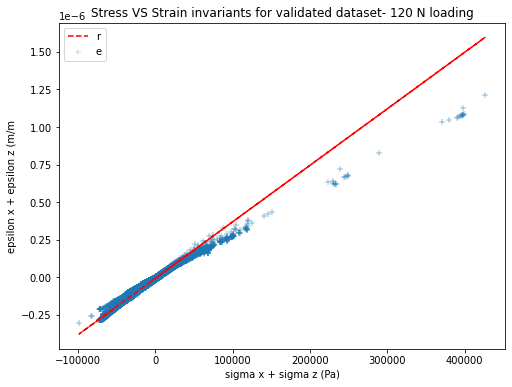

In [ ]:
fig, ax= plt.subplots(1, figsize=(8, 6))

sns.scatterplot(data=df_2, x='sigma x + sigma z', y='epsilon x + epsilon z', marker='+', alpha=0.5)
ax.set_xlabel('sigma x + sigma z (Pa)')
ax.set_ylabel('epsilon x + epsilon z (m/m')
m, b = np.polyfit(df_2['sigma x + sigma z'], df_2['epsilon x + epsilon z'], 1)
plt.plot(df_2['sigma x + sigma z'], m*df_2['sigma x + sigma z'] + b, color='red', linestyle='dashed')
plt.legend('reference linear behaviour')
plt.title('Stress VS Strain invariants for validated dataset- 120 N loading')

Text(0.5, 1.0, 'Stress VS Strain invariants for validated dataset- 130 N loading')

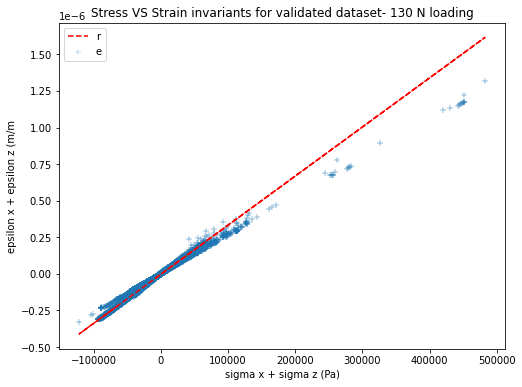

In [ ]:
fig, ax= plt.subplots(1, figsize=(8, 6))

sns.scatterplot(data=df_3, x='sigma x + sigma z', y='epsilon x + epsilon z', marker='+', alpha=0.5)
ax.set_xlabel('sigma x + sigma z (Pa)')
ax.set_ylabel('epsilon x + epsilon z (m/m')
m, b = np.polyfit(df_3['sigma x + sigma z'], df_3['epsilon x + epsilon z'], 1)
plt.plot(df_3['sigma x + sigma z'], m*df_3['sigma x + sigma z'] + b, color='red', linestyle='dashed')
plt.legend('reference linear behaviour')
plt.title('Stress VS Strain invariants for validated dataset- 130 N loading')

Text(0.5, 1.0, 'Stress VS Strain invariants for validated dataset- 140 N loading')

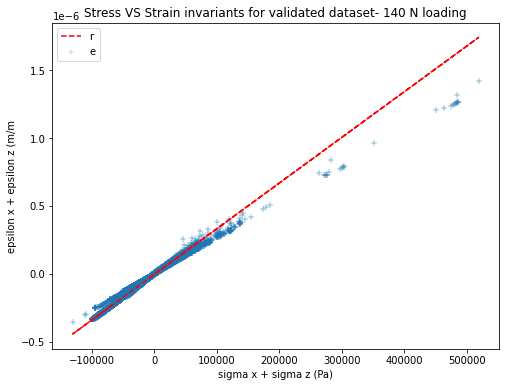

In [ ]:
fig, ax= plt.subplots(1, figsize=(8, 6))

sns.scatterplot(data=df_4, x='sigma x + sigma z', y='epsilon x + epsilon z', marker='+', alpha=0.5)
ax.set_xlabel('sigma x + sigma z (Pa)')
ax.set_ylabel('epsilon x + epsilon z (m/m')
m, b = np.polyfit(df_4['sigma x + sigma z'], df_4['epsilon x + epsilon z'], 1)
plt.plot(df_4['sigma x + sigma z'], m*df_4['sigma x + sigma z'] + b, color='red', linestyle='dashed')
plt.legend('reference linear behaviour')
plt.title('Stress VS Strain invariants for validated dataset- 140 N loading')

## Strain distribution plots

Text(0.5, 1.0, 'Sampling of strain space for generated dataset- 100N')

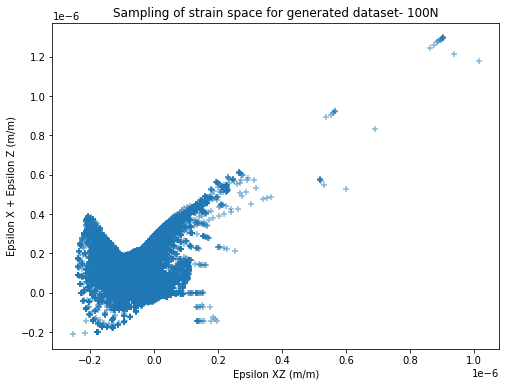

In [ ]:
fig, ax= plt.subplots(1, figsize=(8,6))
ax.scatter(df_1['epsilon x + epsilon z'], df_1['Shear Elastic Strain (m/m) (XZ)'], alpha=0.3, marker='+')
ax.set_xlabel('Epsilon XZ (m/m)')
ax.set_ylabel('Epsilon X + Epsilon Z (m/m)')
plt.title('Sampling of strain space for generated dataset- 100N')

Text(0.5, 1.0, 'Sampling of strain space for generated dataset- 120N')

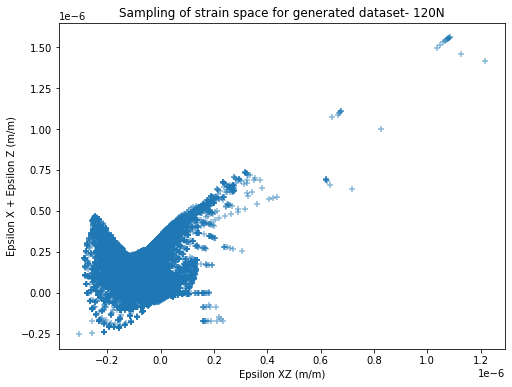

In [ ]:
fig, ax= plt.subplots(1, figsize=(8,6))
ax.scatter(df_2['epsilon x + epsilon z'], df_2['Shear Elastic Strain (m/m) (XZ)'], alpha=0.3, marker='+')
ax.set_xlabel('Epsilon XZ (m/m)')
ax.set_ylabel('Epsilon X + Epsilon Z (m/m)')
plt.title('Sampling of strain space for generated dataset- 120N')

Text(0.5, 1.0, 'Sampling of strain space for generated dataset- 130N')

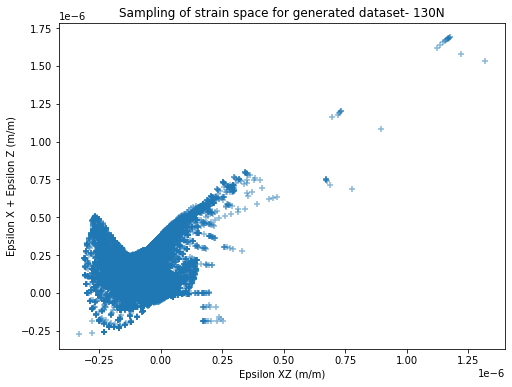

In [ ]:
fig, ax= plt.subplots(1, figsize=(8,6))
ax.scatter(df_3['epsilon x + epsilon z'], df_3['Shear Elastic Strain (m/m) (XZ)'], alpha=0.3, marker='+')
ax.set_xlabel('Epsilon XZ (m/m)')
ax.set_ylabel('Epsilon X + Epsilon Z (m/m)')
plt.title('Sampling of strain space for generated dataset- 130N')

Text(0.5, 1.0, 'Sampling of strain space for generated dataset- 140N')

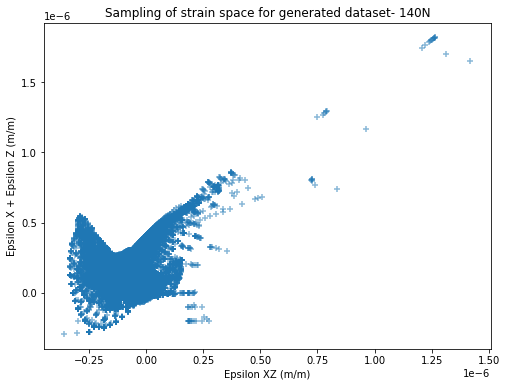

In [ ]:
fig, ax= plt.subplots(1, figsize=(8,6))
ax.scatter(df_4['epsilon x + epsilon z'], df_4['Shear Elastic Strain (m/m) (XZ)'], alpha=0.3, marker='+')
ax.set_xlabel('Epsilon XZ (m/m)')
ax.set_ylabel('Epsilon X + Epsilon Z (m/m)')
plt.title('Sampling of strain space for generated dataset- 140N')

## Model building

In [ ]:
data_1 = df_1[['Normal Elastic Strain (m/m) (X)','Normal Elastic Strain (m/m) (Y)', 'Normal Elastic Strain (m/m) (Z)',
       'Shear Elastic Strain (m/m) (XY)', 'Shear Elastic Strain (m/m) (XZ)',
       'Shear Elastic Strain (m/m) (YZ)','Normal Stress (Pa) (Z)']]

data_2 = df_2[['Normal Elastic Strain (m/m) (X)','Normal Elastic Strain (m/m) (Y)', 'Normal Elastic Strain (m/m) (Z)',
       'Shear Elastic Strain (m/m) (XY)', 'Shear Elastic Strain (m/m) (XZ)',
       'Shear Elastic Strain (m/m) (YZ)','Normal Stress (Pa) (Z)']]

data_3 = df_3[['Normal Elastic Strain (m/m) (X)','Normal Elastic Strain (m/m) (Y)', 'Normal Elastic Strain (m/m) (Z)',
       'Shear Elastic Strain (m/m) (XY)', 'Shear Elastic Strain (m/m) (XZ)',
       'Shear Elastic Strain (m/m) (YZ)','Normal Stress (Pa) (Z)']]

data_4 = df_4[['Normal Elastic Strain (m/m) (X)','Normal Elastic Strain (m/m) (Y)', 'Normal Elastic Strain (m/m) (Z)',
       'Shear Elastic Strain (m/m) (XY)', 'Shear Elastic Strain (m/m) (XZ)',
       'Shear Elastic Strain (m/m) (YZ)','Normal Stress (Pa) (Z)']]     
       

In [ ]:
data_1.head(3)

,Normal Elastic Strain (m/m) (X),Normal Elastic Strain (m/m) (Y),Normal Elastic Strain (m/m) (Z),Shear Elastic Strain (m/m) (XY),Shear Elastic Strain (m/m) (XZ),Shear Elastic Strain (m/m) (YZ),Normal Stress (Pa) (Z)
0,2.041300e-08,8.663100e-09,-4.035800e-08,-9.397300e-09,1.693200e-07,-1.068400e-09,-7510.8
1,2.116100e-08,8.202500e-09,-3.933600e-08,-1.364700e-08,1.606500e-07,-8.547200e-10,-7202.4
2,2.190900e-08,8.124700e-09,-3.895700e-08,-1.397300e-08,1.563600e-07,-4.571600e-10,-7023.0


In [ ]:
X1 =data_1.drop(['Normal Stress (Pa) (Z)'],axis=1)
y1 =data_1['Normal Stress (Pa) (Z)']

X2 =data_2.drop(['Normal Stress (Pa) (Z)'],axis=1)
y2 =data_2['Normal Stress (Pa) (Z)']

X4 =data_4.drop(['Normal Stress (Pa) (Z)'],axis=1)
y4 =data_4['Normal Stress (Pa) (Z)']

#test set
X3 =data_3.drop(['Normal Stress (Pa) (Z)'],axis=1).to_numpy()
y3 =data_3['Normal Stress (Pa) (Z)'].to_numpy().reshape(-1,1)

In [ ]:
#training set
df_m_X = pd.concat([X1, X2, X4], axis=0)
df_m_y = pd.concat([y1, y2, y4], axis=0)

In [ ]:
df_m_X = df_m_X.sample(frac=0.33).to_numpy()
df_m_y = df_m_y.sample(frac=0.33).to_numpy().reshape(-1,1)

In [ ]:
scaler=StandardScaler()

scaler.fit(df_m_X)
scaler.transform(df_m_X)
scaler.fit(df_m_y)
scaler.transform(df_m_y)

scaler.fit(X3)
scaler.transform(X3)
scaler.fit(y3)
scaler.transform(y3)

array([[ 0.99131038],
       [ 1.01894655],
       [ 1.03502226],
       ...,
       [-0.64100919],
       [-1.5414424 ],
       [-2.41581806]])

## SOM regressor

In [ ]:
reg2=[]
df_m_y = df_m_y.ravel()
y3 = y3.ravel()
def modelsom():
  reg = susi.SOMRegressor()
  reg.fit(df_m_X, df_m_y)
  reg2.append(reg)
  y_tpred=reg.predict(df_m_X)
  print("Train R2:",r2_score(df_m_y, y_tpred))
  y_pred=reg.predict(X3)
  print("Test R2:",r2_score(y3, y_pred))
  return y_pred

y_pred_som = modelsom()

Train R2: -0.01704242117789323
Test R2: 0.05365971538988046


In [ ]:
pickle.dump(reg2, open('model_som.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('/content/gdrive/MyDrive/DATA/DATA_Sem8/model_som.pkl', 'rb'))
z1 = pickled_model[0].predict(X3)

In [ ]:
print("Test R2:",r2_score(y3, z1))

Test R2: -0.09927592874822366


## Stacking regression using Decision Tree and SOM regressor

In [ ]:
estimator=[]
estimator.append([('DC', DecisionTreeRegressor()) , ('SOM', susi.SOMRegressor())])
regg=[]
def model(estimator,n):
  reg = StackingRegressor(estimators=estimator[n], n_jobs= -1, verbose=0,final_estimator=RandomForestRegressor(n_estimators=10, random_state=42,n_jobs=-1))
  reg.fit(df_m_X, df_m_y)
  regg.append(reg)
  y_tpred=reg.predict(df_m_X)
  print("Train R2:",r2_score(df_m_y, y_tpred))
  y_pred=reg.predict(X3)
  print("Test R2:",r2_score(y3, y_pred))
  return y_pred

In [ ]:
res_1 = model(estimator, 0)

Train R2: -0.0025152637988350435
Test R2: -0.04038864673992615


In [ ]:
res_2 = model(estimator, 1)

Train R2: -0.28215653192491374
Test R2: -0.26983168937042823


In [ ]:
pickle.dump(regg[0], open('model_DC_som.pkl', 'wb'))
pickle.dump(regg[1], open('model_cb_som.pkl', 'wb'))

In [ ]:
pickled_model_2 = pickle.load(open('/content/gdrive/MyDrive/DATA/DATA_Sem8/model_DC_som.pkl', 'rb'))
z2 = pickled_model_2[0].predict(X3)

pickled_model_3 = pickle.load(open('/content/gdrive/MyDrive/DATA/DATA_Sem8/model_cb_som.pkl', 'rb'))
z3 = pickled_model_3[1].predict(X3)